###Codes for Final Project
Understanding Water Quality in the Main Arm of the Fraser River

In [12]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#stats library

import statsmodels.api as sm
import scipy

#The function below is used to show the plots within the notebook

%matplotlib inline

In [13]:
#Check version of pandas library
pd.__version__

'0.17.0'

In [14]:
#Check version of numpy library
np.__version__

'1.10.1'

In [15]:
#Load dataset using Pandas

water_quality_data=pd.read_csv('../data/Fraser_River_Water_Data.csv', delimiter= ',')

In [16]:
#Print Water_Quality_Data

water_quality_data.head()

,Sample time,Sample number,Sample type,Arsenic Dissolved [Lab: 1] [VMV: 107942],Status(0),Unit code(0),Value modifier code(0),Carbon Dissolved Organic [Lab: -54] [VMV: 1067],Status(1),Unit code(1),...,Unit code(13),Value modifier code(13),Temperature Water [Lab: 80] [VMV: 1125],Status(14),Unit code(14),Value modifier code(14),Temperature Water [Lab: -54] [VMV: 1125],Status(15),Unit code(15),Value modifier code(15)
0,2008-08-27 21:50:00,08PY001319,1,NaN,NaN,NaN,NaN,8.2,U,MG/L,...,NaN,NaN,16,U,DEG C,NaN,NaN,NaN,NaN,NaN
1,2008-09-03 00:25:00,08PY001043,1,NaN,NaN,NaN,NaN,2.0,U,MG/L,...,NaN,NaN,16,U,DEG C,NaN,NaN,NaN,NaN,NaN
2,2008-09-17 22:15:00,08PY001061,1,NaN,NaN,NaN,NaN,2.9,U,MG/L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-09-30 20:30:00,08PY001124,1,NaN,NaN,NaN,NaN,1.6,U,MG/L,...,NaN,NaN,14,U,DEG C,NaN,NaN,NaN,NaN,NaN
4,2008-10-15 19:24:00,08PY001200,1,NaN,NaN,NaN,NaN,4.7,U,MG/L,...,NaN,NaN,11,U,DEG C,NaN,NaN,NaN,NaN,NaN


In [17]:
water_quality_data.tail()

,Sample time,Sample number,Sample type,Arsenic Dissolved [Lab: 1] [VMV: 107942],Status(0),Unit code(0),Value modifier code(0),Carbon Dissolved Organic [Lab: -54] [VMV: 1067],Status(1),Unit code(1),...,Unit code(13),Value modifier code(13),Temperature Water [Lab: 80] [VMV: 1125],Status(14),Unit code(14),Value modifier code(14),Temperature Water [Lab: -54] [VMV: 1125],Status(15),Unit code(15),Value modifier code(15)
91,2015-01-21 22:00:00,15PY005242,1,0.34,U,UG/L,NaN,2.70,U,MG/L,...,NaN,NaN,NaN,NaN,NaN,NaN,4.5,U,DEG C,NaN
92,2015-02-13 19:05:00,15PY005461,1,0.36,U,UG/L,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.3,U,DEG C,NaN
93,2015-03-26 11:04:00,15PY005597,1,NaN,NaN,NaN,NaN,5.53,U,MG/L,...,NaN,NaN,NaN,NaN,NaN,NaN,7.7,U,DEG C,NaN
94,2015-04-16 20:50:00,15PY005838,1,NaN,NaN,NaN,NaN,4.67,U,MG/L,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,U,DEG C,NaN
95,2015-04-30 20:45:00,15PY005887,1,NaN,NaN,NaN,NaN,5.07,U,MG/L,...,NaN,NaN,NaN,NaN,NaN,NaN,10.1,U,DEG C,NaN


In [18]:
#Print the variables for the dataset to help understand the dataset better

water_quality_data.dtypes.head()

Sample time                                  object
Sample number                                object
Sample type                                   int64
Arsenic Dissolved [Lab: 1] [VMV: 107942]    float64
Status(0)                                    object
dtype: object

In [19]:
# Print data frame for variables extracted from water_quality_data

fraser_water_quality.head()

NameError: name 'fraser_water_quality' is not defined

You have not define the fraser_water_quality dataframe, so I got an error: "NameError: name 'fraser_water_quality' is not defined". I'm not sure why or how it works on your computer, maybe you accidnetally delete a cell?

Statistical Analysis for dataset- Linear Modelling

In [20]:
#Import pasty library to run data

from patsy import dmatrices
from patsy.builtins import *

In [21]:
#Extract variables which to be analyzed for assignment

fraser_water_quality_testing=water_quality_data[['Temperature Water [Lab: 80] [VMV: 1125]',
                                         'Oxygen Dissolved [Lab: -54] [VMV: 1124]']]

In [22]:
#Print the head of the new dataframe

fraser_water_quality_testing.head()

,Temperature Water [Lab: 80] [VMV: 1125],Oxygen Dissolved [Lab: -54] [VMV: 1124]
0,16,NaN
1,16,NaN
2,NaN,NaN
3,14,NaN
4,11,NaN


In [23]:
#Remove the NaN from the dataset
water_quality_DO=fraser_water_quality_testing.dropna()

In [24]:
#Print the dataframe for values remaining from those dropped
water_quality_DO

,Temperature Water [Lab: 80] [VMV: 1125],Oxygen Dissolved [Lab: -54] [VMV: 1124]
49,7.5,12.00
53,16.5,10.50
64,7.5,12.70
69,17.5,10.15
70,19.5,9.38
73,20.0,9.05
74,20.6,8.96
75,12.2,9.70


In [25]:
#Change column names

water_quality_DO2= water_quality_DO.rename(columns={'Temperature Water [Lab: 80] [VMV: 1125]':'Temperature_Lab80',
                                                    'Oxygen Dissolved [Lab: -54] [VMV: 1124]':
                                                              'Oxygen_Dissolved_Lab-54'})

In [26]:
#Print the dataframe of the column names changed

water_quality_DO2

,Temperature_Lab80,Oxygen_Dissolved_Lab-54
49,7.5,12.00
53,16.5,10.50
64,7.5,12.70
69,17.5,10.15
70,19.5,9.38
73,20.0,9.05
74,20.6,8.96
75,12.2,9.70


In [27]:
#Linear Model general form for the data

lm= sm.formula.ols(formula="Q('Oxygen_Dissolved_Lab-54') ~ Q('Temperature_Lab80')", data= water_quality_DO2).fit()

In [28]:
# This gives the beta values, the gradient is the time value

lm.params

Intercept                 13.780598
Q('Temperature_Lab80')    -0.229223
dtype: float64

In [29]:
# Used to use the predict function we make a data frame, therefore below we have data frame that is used to make dataframe

x_new=pd.DataFrame({'Temperature_Lab80': range(1,700)})

In [32]:
x_new.head()
# you don't really need to print this out...

,Temperature_Lab80
0,1
1,2
2,3
3,4
4,5


In [22]:
# create predict function to calculate linear model
y_preds=lm.predict(x_new)
y_preds[1:10]
# don't really need to see the y_preds[1:10]

array([ 13.32215146,  13.09292818,  12.86370489,  12.63448161,
        12.40525833,  12.17603504,  11.94681176,  11.71758848,  11.4883652 ])

In [34]:
# you have have these combined in one cell, so it's clearer and cleaner
lm= sm.formula.ols(formula="Q('Oxygen_Dissolved_Lab-54') ~ Q('Temperature_Lab80')", data= water_quality_DO2).fit()
x_new=pd.DataFrame({'Temperature_Lab80': range(1,700)})
y_preds=lm.predict(x_new)

# and see the summary
print(lm.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Q('Oxygen_Dissolved_Lab-54')   R-squared:                       0.812
Model:                                      OLS   Adj. R-squared:                  0.781
Method:                           Least Squares   F-statistic:                     25.96
Date:                          Sun, 15 Nov 2015   Prob (F-statistic):            0.00223
Time:                                  21:06:25   Log-Likelihood:                -6.6875
No. Observations:                             8   AIC:                             17.37
Df Residuals:                                 6   BIC:                             17.53
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------

/Users/billyhung/anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  int(n))


/Users/billyhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


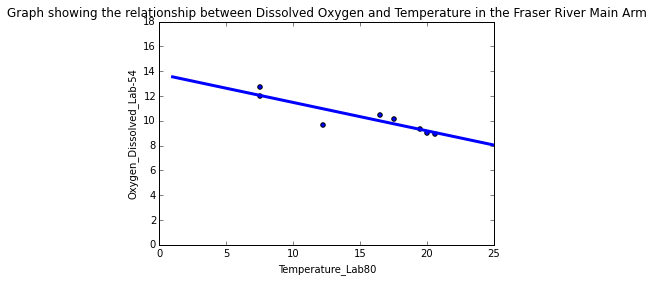

In [45]:
#Plot the linear model for the dataset

water_quality_DO2.plot(kind='scatter', x='Temperature_Lab80', y="Oxygen_Dissolved_Lab-54")

plt.xlim(0,25)
plt.ylim(0,18)
plt.title('Graph showing the relationship between Dissolved Oxygen and Temperature in the Fraser River Main Arm')

plt.plot(x_new, y_preds, c='blue', linewidth=3)
plt.savefig('01.pdf')
# you can use savefig here

In [ ]:
# I need help finding other statistical techniques
# I also need help saving the plot
# Do you guys think I have enough visuals for my data?

Based on the dataset, variables you have to work with, and your researc question,  I don't think you need other statistical techniques. 
Again, based on the dataset and variables you have to work with, I think it's enough visuals because I don't think you can generate more meaningful plots. 
Just be sure to mentioned it in your paper that your sample size is small, so the predicting power is also quite low.

Overall, I think the code and be more concised but writing similar codes in a cell instead of separate cells. The comments are good, but I think people will have no problem using your code in the future!.